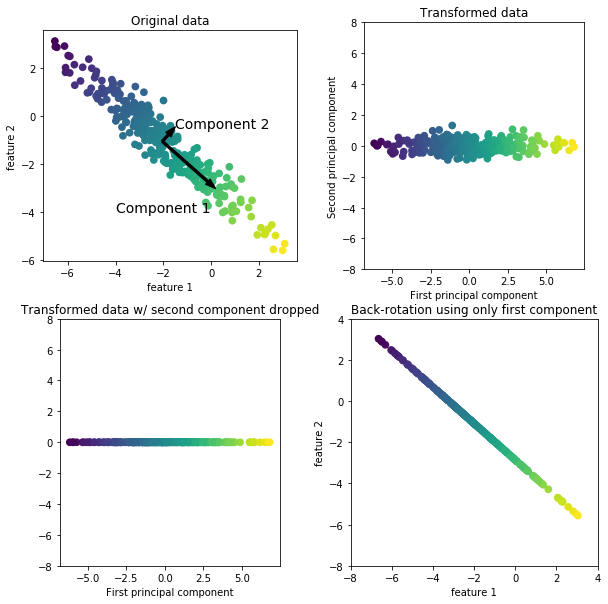

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mglearn

mglearn.plots.plot_pca_illustration()

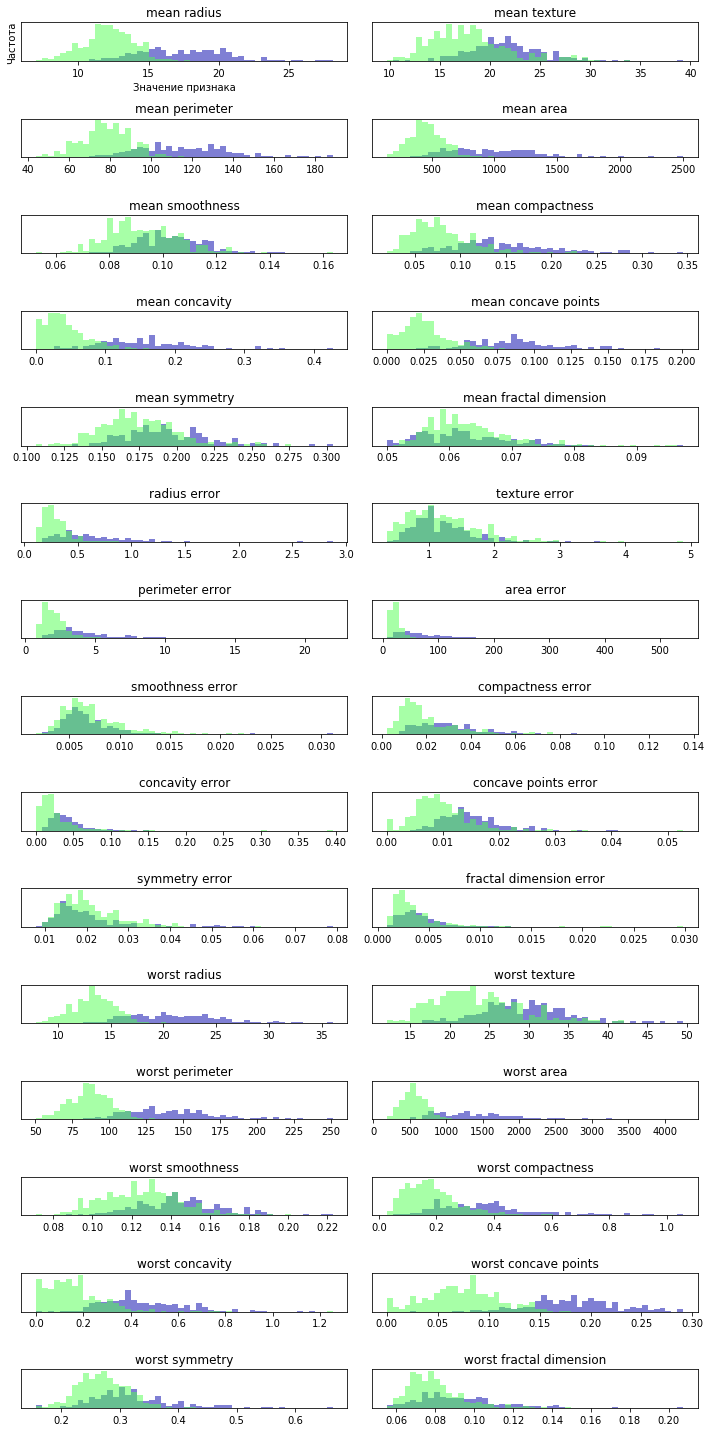

In [6]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

m=data.data[data.target==0]
b=data.data[data.target==1]

fig, axes =plt.subplots(15,2, figsize=(10,20))

ax=axes.ravel()

for i in range(30):
    _, bins = np.histogram(data.data[:,i], bins = 50)
    ax[i].hist(m[:,i], bins=bins, color= mglearn.cm3(0), alpha=0.5)
    ax[i].hist(b[:,i], bins=bins, color= mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(data.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
fig.tight_layout()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(data.data)
data_scaled = scaler.transform(data.data)

In [11]:
from sklearn.decomposition import PCA

#оставляем 2 главные компоненты
pca=PCA(n_components=2)

#подгоняем
pca.fit(data_scaled)

#преобразуем
data_pca=pca.transform(data_scaled)

print(data_pca.shape)

(569, 2)


Text(0,0.5,'second principal component')

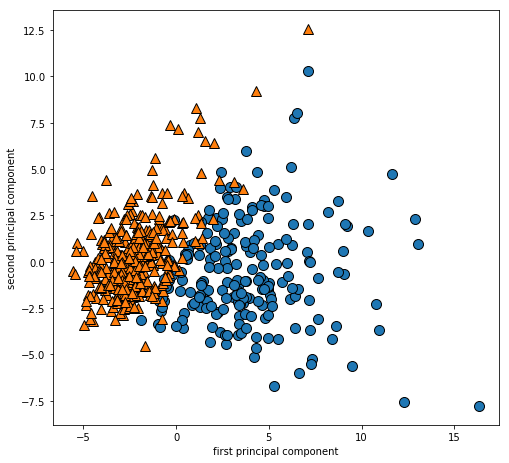

In [13]:
#строим график 2 главных компонент
plt.figure(figsize=(8,8))

mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], data.target)
plt.gca().set_aspect("equal")
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [14]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0,0.5,'principal components')

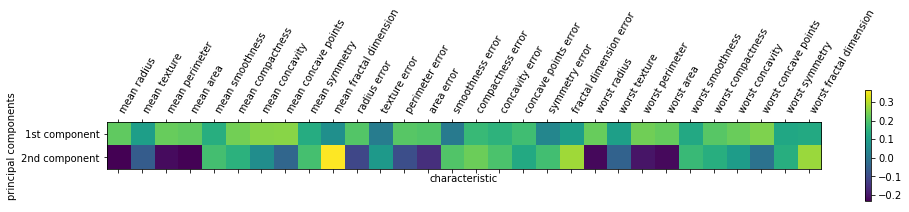

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['1st component', '2nd component'])
plt.colorbar()
plt.xticks(range(len(data.feature_names)), data.feature_names, rotation=60, ha='left')
plt.xlabel('characteristic')
plt.ylabel('principal components')

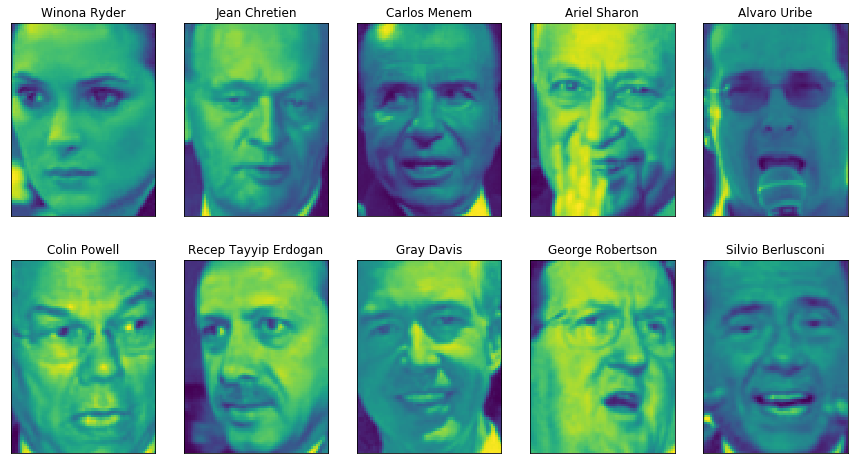

In [21]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

fig, axes = plt.subplots(2,5, figsize=(15,8),subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [23]:
print (people.images.shape)

(3023, 87, 65)


In [26]:
#частота встречаемости каждого варианта
counts=np.bincount(people.target)
for i , (count, name) in enumerate(zip(counts, people.target_names)):
    print (name, count)

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21
Andre Agassi 36
Angelina Jolie 20
Ariel Sharon 77
Arnold Schwarzenegger 42
Atal Bihari Vajpayee 24
Bill Clinton 29
Carlos Menem 21
Colin Powell 236
David Beckham 31
Donald Rumsfeld 121
George Robertson 22
George W Bush 530
Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Gray Davis 26
Guillermo Coria 30
Hamid Karzai 22
Hans Blix 39
Hugo Chavez 71
Igor Ivanov 20
Jack Straw 28
Jacques Chirac 52
Jean Chretien 55
Jennifer Aniston 21
Jennifer Capriati 42
Jennifer Lopez 21
Jeremy Greenstock 24
Jiang Zemin 20
John Ashcroft 53
John Negroponte 31
Jose Maria Aznar 23
Juan Carlos Ferrero 28
Junichiro Koizumi 60
Kofi Annan 32
Laura Bush 41
Lindsay Davenport 22
Lleyton Hewitt 41
Luiz Inacio Lula da Silva 48
Mahmoud Abbas 29
Megawati Sukarnoputri 33
Michael Bloomberg 20
Naomi Watts 22
Nestor Kirchner 37
Paul Bremer 20
Pete Sampras 22
Recep Tayyip Erdogan 30
Ricardo Lagos 27
Roh Moo-hyun 32
Rudolph Giuliani 26
Saddam Hussein 23
Serena Williams 52

In [29]:
mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/255

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [35]:
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [37]:
pca.components_.shape

(100, 5655)

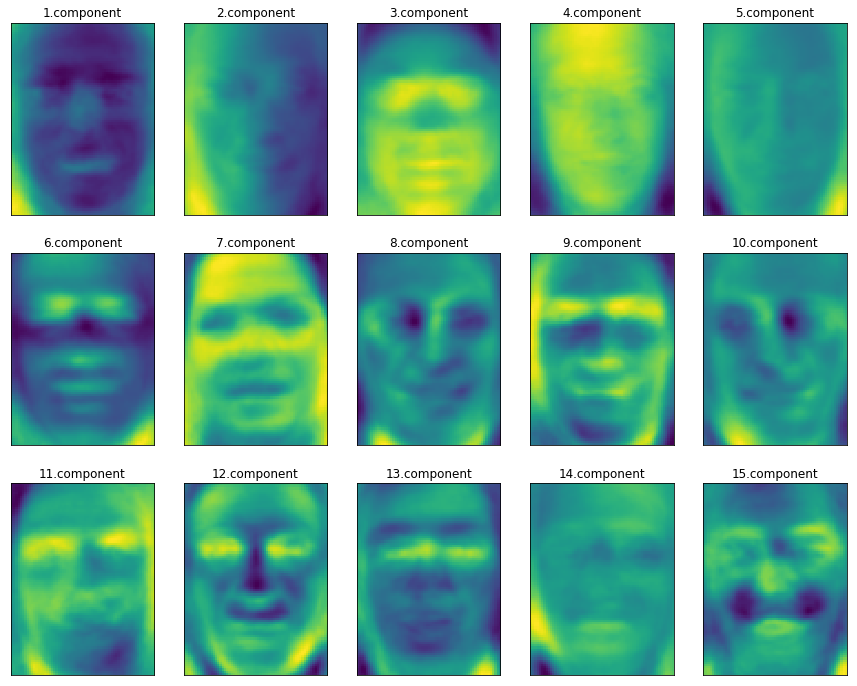

In [38]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i , (component, ax) in enumerate (zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.535948, ...,  0.243137],
       ..., 
       [ 0.043137, ...,  0.596078]], dtype=float32), 
array([[ 0.237908, ...,  0.269281],
       ..., 
       [ 0.4     , ...,  0.254902]], dtype=float32))
________________________________________________________pca_faces - 8.1s, 0.1min


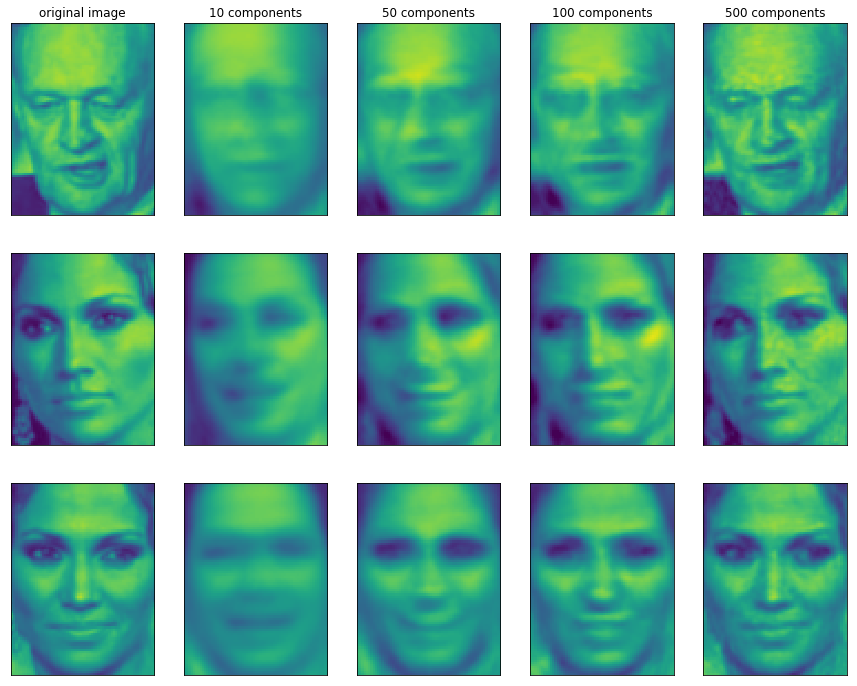

In [40]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)